In [ ]:
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

Gán tên cho labels, tạo hàm show hình ảnh bằng plt.ishow()

In [ ]:
y_train,y_test = y_train.reshape(-1,), y_test.reshape(-1,)
label_name = ['airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck']
def show(X,y,id):
    plt.figure(figsize=(15,2))
    plt.imshow(X[id])
    plt.xlabel(label_name[y_train[id]])


Gỉam giá trị các phần tử màu RGB (0-255) 

In [ ]:
X_train,X_test = X_train/255, X_test/255


Model sử dụng 2 layers, activation function của Dense là softmax, sử dụng avgpooling2D

In [71]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape = (32,32,3)),
    layers.AveragePooling2D(),
    
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape = (32,32,3)),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])



optimize sử dụng là SGD, loss funtion là categorical crossentropy

In [72]:
cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,batch_size=10,epochs =10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 34s 7ms/step - loss: 1.7586 - accuracy: 0.3611 - val_loss: 1.5077 - val_accuracy: 0.4536
Epoch 2/10
5000/5000 [==============================] - 33s 7ms/step - loss: 1.4121 - accuracy: 0.4917 - val_loss: 1.3345 - val_accuracy: 0.5182
Epoch 3/10
5000/5000 [==============================] - 33s 7ms/step - loss: 1.2813 - accuracy: 0.5435 - val_loss: 1.2356 - val_accuracy: 0.5648
Epoch 4/10
5000/5000 [==============================] - 34s 7ms/step - loss: 1.1905 - accuracy: 0.5775 - val_loss: 1.1717 - val_accuracy: 0.5829
Epoch 5/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.1111 - accuracy: 0.6089 - val_loss: 1.1728 - val_accuracy: 0.5942
Epoch 6/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.0449 - accuracy: 0.6311 - val_loss: 1.1410 - val_accuracy: 0.5994
Epoch 7/10
5000/5000 [==============================] - 36s 7ms/step - loss: 0.9858 - accuracy: 0.6533 - val_loss: 1.1353 - val_ac

Đồ thị bên dưới em so sánh accuracy mà model train được so với accuracy khi áp dụng thực tế với bộ (X_test,y_test) của từng epoch


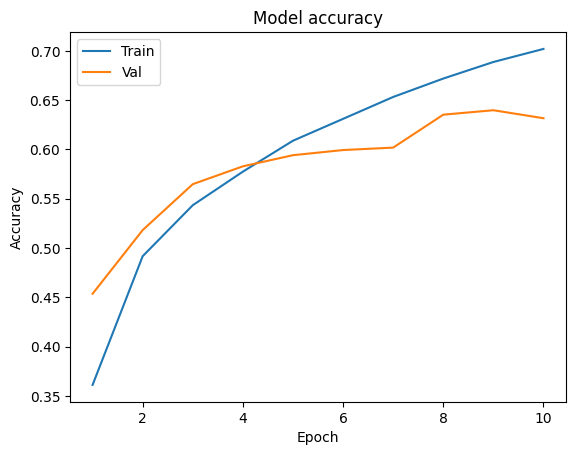

In [73]:
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

Đồ thị bên dưới em so sánh sự mất mát theo mô hình train và mất mát thực tế của từng Epoch


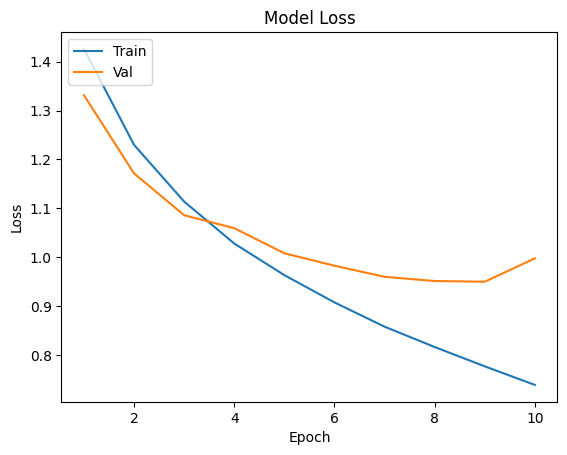

In [70]:
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()